# Exploratory Data Analysis: 
Medicare/Medicaid Drug Spending (2012-2020)



In [8]:
#pandas for dataframes/reading in csv data/saving csv data
import pandas as pd

#numeric types/computation, vectorized pandas operations
import numpy as np

#simple, quick plots
import matplotlib.pyplot as plt
import plotly.express as px

#text manipulation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/paul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
filename = "../data/clean/drug_uses_clean.csv"
uses = pd.read_csv(filename, header=0, index_col=0)
filename2 = "../data/clean/spending_cleaned.csv"
spending = pd.read_csv(filename2, header=0, index_col=0)

In [12]:
def plot_words(years: list, filter_words=None):
    #check user input
    if filter_words == None:
        stops = set(stopwords.words('english'))
    else:
        stops = set(stopwords.words('english') + filter_words)
    
    for year in years:
        #check for various input lengths "19" vs "2019"
        if year < 21:
            year = int("20"+str(year))
        if (year > 20) & (year < 2012):
            print("Invalid Input\n")
            break
        elif (year > 2020):
            print(f"{year} is an INVALID input\n")
            break

        print('\n', year, '\t')
        
        
        data_by_year = spending[spending['year']==year].copy()
        data_by_year.sort_values("total_spending", ascending=False, inplace=True)
        
        #convert long floats to simpler string values for printing
        data_by_year['total_spending'] = data_by_year['total_spending'].astype(str).apply(
                                                                lambda x: x[0] + "."+ x[1:3] + " Billion")

        print(data_by_year[['brand_name', 'total_spending', 'coverage_type']].head(10))
        names = data_by_year["brand_name"].head(10).apply(lambda x: x.strip().lower()).unique()
        
        #combine text of top drug uses/descriptions
        text = ''.join(uses[uses["brand_name"].isin(names)].uses)
        text = text.lower()
        
        print(f"\n A word cloud of the 10 most expensive drug descriptions for {year}\n")
        wc = WordCloud()
        
        # set stopwords based on user input, if given
        wc.stopwords = stops
        
        wc.generate(text)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.show()

### Let's try using some word clouds to get more info about the most expensive drugs. The word clouds will display the most common words among the combined drug descriptions, automatically filtering out some basic stop words ("the", "and", "is"...etc).

Pick a year or years between 2012 and 2020 
Numbers only, please --   12 15

 2012 	
                 brand_name total_spending coverage_type
58389                nexium   2.12 Billion      medicare
56722         advair diskus   1.88 Billion      medicare
21979               abilify   1.88 Billion      medicaid
57270               crestor   1.78 Billion      medicare
56675               abilify   1.75 Billion      medicare
58631                plavix   1.69 Billion      medicare
58979               spiriva   1.60 Billion      medicare
57290              cymbalta   1.43 Billion      medicare
58341               namenda   1.32 Billion      medicare
56875  atorvastatin calcium   1.27 Billion      medicare

 A word cloud of the 10 most expensive drug descriptions for 2012



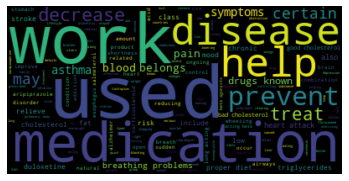


 2015 	
            brand_name total_spending coverage_type
66290          harvoni   7.03 Billion      medicare
65754          crestor   2.88 Billion      medicare
66506  lantus solostar   2.48 Billion      medicare
65206    advair diskus   2.27 Billion      medicare
33447          harvoni   2.19 Billion      medicaid
67463          spiriva   2.19 Billion      medicare
66430          januvia   2.13 Billion      medicare
67329         revlimid   2.07 Billion      medicare
32068          abilify   2.03 Billion      medicaid
66873           nexium   2.01 Billion      medicare

 A word cloud of the 10 most expensive drug descriptions for 2015



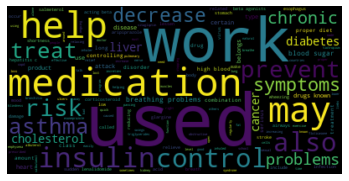

In [16]:
user_input = [int(x) for x in input("Pick a year or years between 2012 and 2020 \nNumbers only, please --   ").split()]
plot_words(user_input, None)

#### From above, it looks like the most costly total spending is for Medicare drugs related to heart disease, diabetes, blood pressure. This makes sense, as Medicare is mostly for patients over 65 (young disabled patients and a few other categories qualify). Unfortunately, a lot of the words in the descriptions are not very informative, ie. "work", "used", "medication", "help". 

#### Let's try filtering out some words and see how our results change.

Pick a year or years between 2012:2020 
Numbers only, please --   12 15

 Add some words you'd like to filter out from the word cloud displays --    

 2012 	
                 brand_name total_spending coverage_type
58389                nexium   2.12 Billion      medicare
56722         advair diskus   1.88 Billion      medicare
21979               abilify   1.88 Billion      medicaid
57270               crestor   1.78 Billion      medicare
56675               abilify   1.75 Billion      medicare
58631                plavix   1.69 Billion      medicare
58979               spiriva   1.60 Billion      medicare
57290              cymbalta   1.43 Billion      medicare
58341               namenda   1.32 Billion      medicare
56875  atorvastatin calcium   1.27 Billion      medicare

 A word cloud of the 10 most expensive drug descriptions for 2012



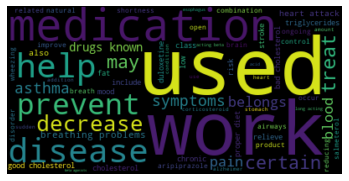


 2015 	
            brand_name total_spending coverage_type
66290          harvoni   7.03 Billion      medicare
65754          crestor   2.88 Billion      medicare
66506  lantus solostar   2.48 Billion      medicare
65206    advair diskus   2.27 Billion      medicare
33447          harvoni   2.19 Billion      medicaid
67463          spiriva   2.19 Billion      medicare
66430          januvia   2.13 Billion      medicare
67329         revlimid   2.07 Billion      medicare
32068          abilify   2.03 Billion      medicaid
66873           nexium   2.01 Billion      medicare

 A word cloud of the 10 most expensive drug descriptions for 2015



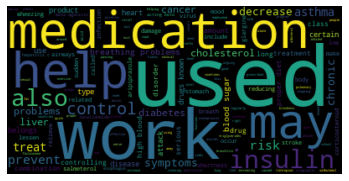

In [15]:
user_input = [int(x) for x in input("Pick a year or years between 2012 and 2020 \nNumbers only, please --   ").split()]
words_to_remove = input("\n Add some words you'd like to filter out from the word cloud displays --    ").split()
plot_words(user_input, filter_words = words_to_remove)

### Even with filtering out some words, there are a lot of unhelpful words in the drug description that don't help us understand what kind of relationship there is between the most expensive drugs and their uses. Symptoms and a lot of other random words are obscuring the data.

## Looking at spending

In [26]:
costs = spending.groupby(["year", "coverage_type"])['total_spending'].sum().reset_index()



year               int64
coverage_type     object
total_spending     int64
dtype: object

In [31]:
fig = px.line(costs, x="year", y='total_spending',
             color='coverage_type', height=400)
fig.show()

### It seems that medicare spending is increasing faster than medicaid spending. That makes sense, as a large portion of medicaid recipients are younger and most likely healthier. Baby boomers are just starting to reach the age of receiving medicare, which will likely result in a big increase in Medicare claims and spending.


In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.medicaid.gov/sites/default/files/2021-09/share-of-medicaid-chip-pop-by-age_0.png")

### Above, data from Medicaid.gov showing the average ages of medicaid/chip recipients. In 2021, there were approximately 79 million recipients of Medicaid.

https://www.medicaid.gov/medicaid/program-information/medicaid-and-chip-enrollment-data/report-highlights/index.html

### Medicare part D enrollment (drugs, which is what our data is here) was approximately 39 million in 2021

https://www.cms.gov/newsroom/news-alert/cms-releases-latest-enrollment-figures-medicare-medicaid-and-childrens-health-insurance-program-chip#:~:text=As%20of%20October%202021%2C%20the,and%20without%20prescription%20drug%20coverage.

## Let's look at total claims

In [34]:
claims = spending.groupby(["year", "coverage_type"])['total_claims'].sum().reset_index()


In [36]:
fig = px.line(claims, x="year", y='total_claims',
             color='coverage_type', height=400)
fig.show()

### Medicare shows a rising number of claims. Medicaid is a bit flatter, but still rising.